Implement and demonstrate the FIND-S algorithm for finding the most specific hypothesis
based on a given set of training data samples.


In [ ]:
import csv

a = []
with open('enjoysport.csv', 'r') as csvfile:
    for row in csv.reader(csvfile):
        a.append(row)

print(a)
print("\n The total number of training instances are : ",len(a))

num_attribute = len(a[0])-1
print("\n The initial hypothesis is : ")
hypothesis = ['0']*num_attribute
print(hypothesis)

for i in range(0, len(a)):
    if a[i][num_attribute] == 'Yes': # Corrected 'yes' to 'Yes' based on the dummy data
        for j in range(0, num_attribute):
            if hypothesis[j] == '0' or hypothesis[j] == a[i][j]:
                hypothesis[j] = a[i][j]
            else:
                hypothesis[j] = '?'
    print("\n The hypothesis for the training instance {} is :\n" .format(i+1),hypothesis)

print("\n The Maximally specific hypothesis for the training instance is ")
print(hypothesis)

[['Sky', 'Airlock', 'Warm', 'Strong', 'Warm', 'Same', 'Yes'], ['Sky', 'Airlock', 'Cold', 'Strong', 'Warm', 'Change', 'Yes'], ['Sky', 'Water', 'Warm', 'Strong', 'Warm', 'Same', 'Yes'], ['Sky', 'Airlock', 'Warm', 'Strong', 'Cool', 'Change', 'No']]

 The total number of training instances are :  4

 The initial hypothesis is : 
['0', '0', '0', '0', '0', '0']

 The hypothesis for the training instance 1 is :
 ['Sky', 'Airlock', 'Warm', 'Strong', 'Warm', 'Same']

 The hypothesis for the training instance 2 is :
 ['Sky', 'Airlock', '?', 'Strong', 'Warm', '?']

 The hypothesis for the training instance 3 is :
 ['Sky', '?', '?', 'Strong', 'Warm', '?']

 The hypothesis for the training instance 4 is :
 ['Sky', '?', '?', 'Strong', 'Warm', '?']

 The Maximally specific hypothesis for the training instance is 
['Sky', '?', '?', 'Strong', 'Warm', '?']


For a given set of training data examples stored in a .CSV file, implement and demonstrate the
Candidate-Elimination algorithm in python to output a description of the set of all hypotheses
consistent with the training examples

In [ ]:
import numpy as np
import pandas as pd
data = pd.DataFrame(data=pd.read_csv('enjoysport.csv'))
concepts = np.array(data.iloc[:,0:-1])
print(concepts)
target = np.array(data.iloc[:,-1])
print(target)
def learn(concepts, target):
    specific_h = concepts[0].copy()
    print("initialization of specific_h and general_h")
    print(specific_h)
    general_h = [["?" for i in range(len(specific_h))] for i in
range(len(specific_h))]
    print(general_h)
    for i, h in enumerate(concepts):
        if target[i] == "yes":
            for x in range(len(specific_h)):
                if h[x]!= specific_h[x]:
                    specific_h[x] ='?'
                    general_h[x][x] ='?'

                print(specific_h)
        print(specific_h)
        if target[i] == "no":
            for x in range(len(specific_h)):
                if h[x]!= specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'
        print(" steps of Candidate Elimination Algorithm",i+1)
        print(specific_h)
        print(general_h)
    indices = [i for i, val in enumerate(general_h) if val ==['?', '?', '?', '?', '?', '?']]
    for i in indices:
        general_h.remove(['?', '?', '?', '?', '?', '?'])
    return specific_h, general_h
s_final, g_final = learn(concepts, target)
print("Final Specific_h:", s_final, sep="\n")
print("Final General_h:", g_final, sep="\n")

[['Sky' 'Airlock' 'Cold' 'Strong' 'Warm' 'Change']
 ['Sky' 'Water' 'Warm' 'Strong' 'Warm' 'Same']
 ['Sky' 'Airlock' 'Warm' 'Strong' 'Cool' 'Change']]
['Yes' 'Yes' 'No']
initialization of specific_h and general_h
['Sky' 'Airlock' 'Cold' 'Strong' 'Warm' 'Change']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
['Sky' 'Airlock' 'Cold' 'Strong' 'Warm' 'Change']
 steps of Candidate Elimination Algorithm 1
['Sky' 'Airlock' 'Cold' 'Strong' 'Warm' 'Change']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
['Sky' 'Airlock' 'Cold' 'Strong' 'Warm' 'Change']
 steps of Candidate Elimination Algorithm 2
['Sky' 'Airlock' 'Cold' 'Strong' 'Warm' 'Change']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'],

Demonstrate the working of the decision tree based ID3 algorithm. Use an appropriate data set
for building the decision tree and apply this knowledge to classify a new sample.

In [ ]:
import pandas as pd
import numpy as np
import math

# Define a class for the decision tree node
class DecisionTreeNode:
    def __init__(self, attribute=None, label=None, branches={}):
        self.attribute = attribute  # the attribute used to split the data
        self.label = label  # the label assigned to this node
        self.branches = branches  # the branches of the decision tree

# Define a function to calculate the entropy of a dataset
def entropy(data):
    target = data['target']
    n = len(target)
    unique, counts = np.unique(target, return_counts=True)
    entropy = 0
    for i in range(len(unique)):
        p = counts[i] / n
        entropy -= p * math.log2(p)
    return entropy

# Define a function to calculate the information gain of an attribute
def information_gain(data, attribute):
    n = len(data)
    values = data[attribute].unique()
    entropy_s = entropy(data)
    entropy_attr = 0
    for value in values:
        subset = data[data[attribute] == value]
        subset_n = len(subset)
        subset_entropy = entropy(subset)
        entropy_attr += subset_n / n * subset_entropy
    return entropy_s - entropy_attr

# Define the ID3 algorithm
def id3(data, attributes):
    target = data['target']
    # If all the examples have the same target value, return a leaf node with that value
    if len(target.unique()) == 1:
        return DecisionTreeNode(label=target.iloc[0])
    # If there are no attributes left to split on, return a leaf node with the most common target value
    if len(attributes) == 0:
        return DecisionTreeNode(label=target.value_counts().idxmax())
    # Otherwise, select the attribute with the highest information gain
    gains = {attr: information_gain(data, attr) for attr in attributes}
    best_attribute = max(gains, key=gains.get)
    # Create a new decision tree node with the selected attribute
    node = DecisionTreeNode(attribute=best_attribute)
    # Split the data based on the selected attribute and recursively build the tree
    for value in data[best_attribute].unique():
        subset = data[data[best_attribute] == value].drop(best_attribute, axis=1)
        if len(subset) == 0:
            node.branches[value] = DecisionTreeNode(label=target.value_counts().idxmax())
        else:
            new_attributes = attributes.copy()
            new_attributes.remove(best_attribute)
            node.branches[value] = id3(subset, new_attributes)
    return node

# Load the dataset
data = pd.read_csv('play_tennis.csv')
# Split the dataset into attributes and target variable
attributes = data.columns[:-1].tolist()
data = data.rename(columns={data.columns[-1]: 'target'}) # Rename the target column to 'target'
# Build the decision tree using ID3 algorithm
root = id3(data, attributes)

# Define a function to classify a new sample using the decision tree
def classify(sample, tree):
    if tree.label is not None:
        return tree.label
    attribute = tree.attribute
    value = sample[attribute]
    if value not in tree.branches:
        # Handle the case where a value is not present in the training data
        # For simplicity, we can return the most common label in the training data
        return data['target'].value_counts().idxmax()
    subtree = tree.branches[value]
    return classify(sample, subtree)

# Example usage:
# Create a new sample
new_sample = {'Outlook': 'Sunny', 'Temperature': 'Cool', 'Humidity': 'High', 'Wind': 'Strong'}

# Classify the new sample
prediction = classify(new_sample, root)

# Print the prediction
print(f"The predicted class for the new sample is: {prediction}")

The predicted class for the new sample is: No


Build an Artificial Neural Network by implementing the Backpropagation algorithm and test the
same using appropriate data sets.

In [ ]:
import numpy as np

X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
X = X/np.amax(X,axis=0) #maximum of X array longitudinally
y = y/100

#Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

#Variable initialization
epoch=5 #Setting training iterations
lr=0.1 #Setting learning rate

inputlayer_neurons = 2 #number of features in data set
hiddenlayer_neurons = 3 #number of hidden layers neurons
output_neurons = 1 #number of neurons at output layer
#weight and bias initialization

wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))

#draws a random range of numbers uniformly of dim x*y
for i in range(epoch):
    #Forward Propogation
    hinp1=np.dot(X,wh)
    hinp=hinp1 + bh
    hlayer_act = sigmoid(hinp)
    outinp1=np.dot(hlayer_act,wout)
    outinp= outinp1+bout
    output = sigmoid(outinp)

    #Backpropagation
    EO = y-output
    outgrad = derivatives_sigmoid(output)
    d_output = EO * outgrad
    EH = d_output.dot(wout.T)
    hiddengrad = derivatives_sigmoid(hlayer_act)#how much hidden layer wts contributed to error
    d_hiddenlayer = EH * hiddengrad

    wout += hlayer_act.T.dot(d_output) *lr   # dotproduct of nextlayererror and currentlayerop
    wh += X.T.dot(d_hiddenlayer) *lr

    print ("-----------Epoch-", i+1, "Starts----------")
    print("Input: \n" + str(X))
    print("Actual Output: \n" + str(y))
    print("Predicted Output: \n" ,output)
    print ("-----------Epoch-", i+1, "Ends----------\n")

print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)

-----------Epoch- 1 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.84077795]
 [0.83147525]
 [0.84340907]]
-----------Epoch- 1 Ends----------

-----------Epoch- 2 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.84137613]
 [0.83204294]
 [0.84401085]]
-----------Epoch- 2 Ends----------

-----------Epoch- 3 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.84196398]
 [0.83260102]
 [0.84460219]]
-----------Epoch- 3 Ends----------

-----------Epoch- 4 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.84254176]
 [0.83314973]
 [0.845

Write a program for Implementation of K-Nearest Neighbours (K-NN) in Python

In [ ]:
import math
import csv

def load_csv(filename):
    lines = csv.reader(open(filename, "r"))
    dataset = list(lines)
    headers = dataset.pop(0)
    return dataset, headers

class Node:
    def __init__(self, attribute):
        self.attribute = attribute
        self.children = []
        self.answer = ""

def subtables(data, col, delete):
    dic = {}
    coldata = [row[col] for row in data]
    attr = list(set(coldata))
    counts = [0] * len(attr)
    r = len(data)
    c = len(data[0])
    for x in range(len(attr)):
        for y in range(r):
            if data[y][col] == attr[x]:
                counts[x] += 1
    for x in range(len(attr)):
        dic[attr[x]] = [[0 for i in range(c)] for j in range(counts[x])]
        pos = 0
        for y in range(r):
            if data[y][col] == attr[x]:
                if delete:
                    del data[y][col]
                dic[attr[x]][pos] = data[y]
                pos += 1
    return attr, dic

def entropy(S):
    attr = list(set(S))
    if len(attr) == 1:
        return 0
    counts = [0, 0]
    for i in range(2):
        counts[i] = sum([1 for x in S if attr[i] == x]) / (len(S) * 1.0)
    sums = 0
    for cnt in counts:
        sums += -1 * cnt * math.log(cnt, 2)
    return sums

def compute_gain(data, col):
    attr, dic = subtables(data, col, delete=False)
    total_size = len(data)
    entropies = [0] * len(attr)
    ratio = [0] * len(attr)
    total_entropy = entropy([row[-1] for row in data])
    for x in range(len(attr)):
        ratio[x] = len(dic[attr[x]]) / (total_size * 1.0)
        entropies[x] = entropy([row[-1] for row in dic[attr[x]]])
        total_entropy -= ratio[x] * entropies[x]
    return total_entropy

def build_tree(data, features):
    lastcol = [row[-1] for row in data]
    if len(set(lastcol)) == 1:
        node = Node("")
        node.answer = lastcol[0]
        return node
    n = len(data[0]) - 1
    gains = [0] * n
    for col in range(n):
        gains[col] = compute_gain(data, col)
    split = gains.index(max(gains))
    node = Node(features[split])
    fea = features[:split] + features[split + 1:]
    attr, dic = subtables(data, split, delete=True)
    for x in range(len(attr)):
        child = build_tree(dic[attr[x]], fea)
        node.children.append((attr[x], child))
    return node

def print_tree(node, level):
    if node.answer != "":
        print(" " * level, node.answer)
        return
    print(" " * level, node.attribute)
    for value, n in node.children:
        print(" " * (level + 1), value)
        print_tree(n, level + 2)

def classify(node, x_test, features):
    if node.answer != "":
        print(node.answer)
        return
    pos = features.index(node.attribute)
    for value, n in node.children:
        if x_test[pos] == value:
            classify(n, x_test, features)

'''Main program'''
dataset, features = load_csv("data3.csv")
node1 = build_tree(dataset, features)
print("The decision tree for the dataset using ID3 algorithm is")
print_tree(node1, 0)
testdata, features = load_csv("data3_test.csv")
for xtest in testdata:
    print("The test instance:", xtest)
    print("The label for test instance:", end=" ")
    classify(node1, xtest, features)

The decision tree for the dataset using ID3 algorithm is
 Outlook
  Overcast
   Yes
  Sunny
   Humidity
    Normal
     Yes
    High
     No
  Rain
   Wind
    Weak
     Yes
    Strong
     No
The test instance: ['Sunny', 'Cool', 'High', 'Strong', 'No']
The label for test instance: No
The test instance: ['Overcast', 'Hot', 'Normal', 'Weak', 'Yes']
The label for test instance: Yes
The test instance: ['Rain', 'Mild', 'High', 'Weak', 'Yes']
The label for test instance: Yes


Write a program to implement Naïve Bayes algorithm in python and to display the results using
confusion matrix and accuracy.

In [ ]:
# import required libraries
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# load iris dataset
iris = load_iris()

# split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

# create Naive Bayes classifier
classifier = GaussianNB()

# train the classifier using the training data
classifier.fit(X_train, y_train)

# predict the target values for the testing data
y_pred = classifier.predict(X_test)

# display confusion matrix and accuracy score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

acc = accuracy_score(y_test, y_pred)
print("Accuracy Score:", acc)

Confusion Matrix:
[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
Accuracy Score: 1.0


Write a program to implement Logistic Regression (LR) algorithm in python

Coefficients:  [[1.97026731]]
Intercept:  [1.20847145]


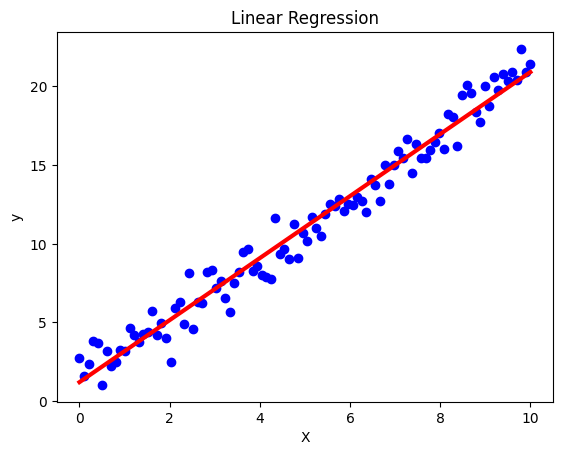

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate sample data
np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X + 1 + np.random.randn(100, 1)

# Create linear regression object
lr_model = LinearRegression()

# Train the model using the training sets
lr_model.fit(X, y)

# Print the coefficients
print('Coefficients: ', lr_model.coef_)
print('Intercept: ', lr_model.intercept_)

# Plot the data and the linear regression line
plt.scatter(X, y, color='blue')
plt.plot(X, lr_model.predict(X), color='red', linewidth=3)
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Write a program to implement Linear Regression (LR) algorithm in python# Step 1: Import the required modules
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd





[1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0
 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1]


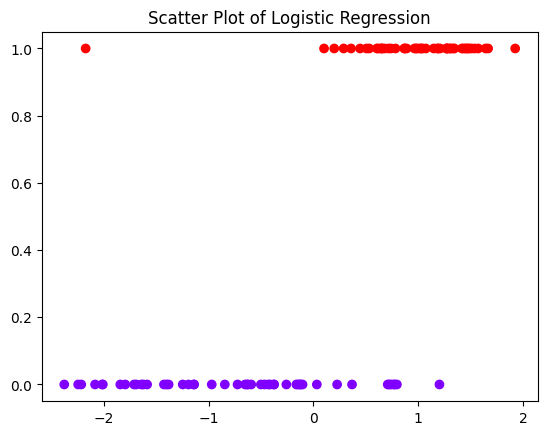

array([[ 9,  2],
       [ 0, 14]])

In [ ]:
# Step 1: Import the required modules
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

# Step 2: Generate the dataset
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)
print(y)

# Step 3: visualize the data
plt.scatter(x, y, c=y, cmap='rainbow')
plt.title('Scatter Plot of Logistic Regression')
plt.show()

# Step 4: Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

x_train.shape

# Step 4: Perform Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

# Step 5: Make prediction using the model
y_pred = log_reg.predict(x_test)

# Step 6: Display the Confusion Matrix
confusion_matrix(y_test, y_pred)

Compare Linear and Polynomial Regression using Python

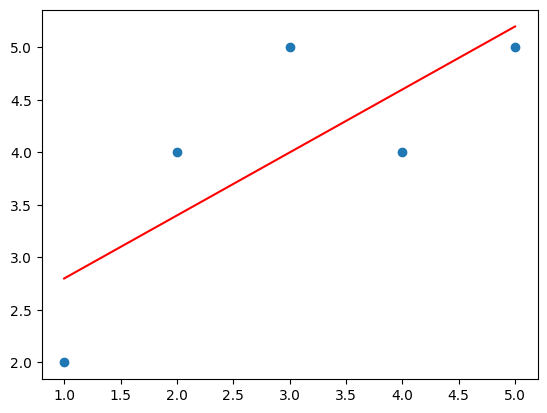

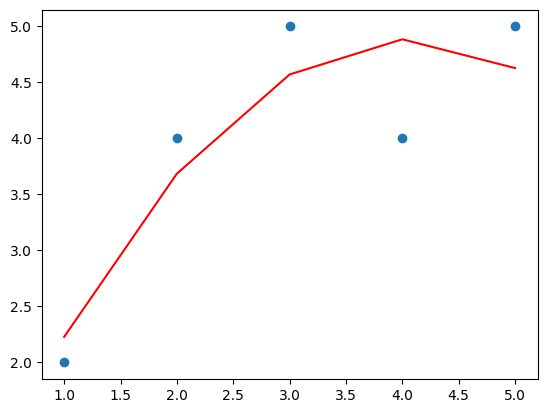

In [ ]:

import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Create some sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 4, 5, 4, 5]).reshape(-1, 1)

# Create a linear regression object and fit the data
reg = LinearRegression().fit(X, y)

# Predict new values
X_new = np.array([6]).reshape(-1, 1)
y_pred = reg.predict(X_new)

# Plot the data and the linear regression line
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.show()

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Create some sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 4, 5, 4, 5]).reshape(-1, 1)

# Transform the data to include another axis
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Create a polynomial regression object and fit the data
reg = LinearRegression().fit(X_poly, y)

# Predict new values
X_new = np.array([6]).reshape(-1, 1)
X_new_poly = poly.transform(X_new)
y_pred = reg.predict(X_new_poly)

# Plot the data and the polynomial regression curve
plt.scatter(X, y)
plt.plot(X, reg.predict(X_poly), color='red')
plt.show()

Write a Python Program to Implement Expectation & Maximization Algorithm

In [ ]:
import numpy as np
from scipy.stats import norm

# Define the data
data = np.array([1.2, 2.3, 0.7, 1.6, 1.1, 1.8, 0.9, 2.2])

# Initialize the parameters
mu1 = 0
mu2 = 1
sigma1 = 1
sigma2 = 1
p1 = 0.5
p2 = 0.5

# Run the EM algorithm
for i in range(10):
    # E-step
    likelihood1 = norm.pdf(data, mu1, sigma1)
    likelihood2 = norm.pdf(data, mu2, sigma2)
    weight1 = p1 * likelihood1 / (p1 * likelihood1 + p2 * likelihood2)
    weight2 = p2 * likelihood2 / (p1 * likelihood1 + p2 * likelihood2)

    # M-step
    mu1 = np.sum(weight1 * data) / np.sum(weight1)
    mu2 = np.sum(weight2 * data) / np.sum(weight2)
    sigma1 = np.sqrt(np.sum(weight1 * (data - mu1)**2) / np.sum(weight1))
    sigma2 = np.sqrt(np.sum(weight2 * (data - mu2)**2) / np.sum(weight2))
    p1 = np.mean(weight1)
    p2 = np.mean(weight2)

# Print the final estimates of the parameters
print("mu1:", mu1)
print("mu2:", mu2)
print("sigma1:", sigma1)
print("sigma2:", sigma2)
print("p1:", p1)
print("p2:", p2)

mu1: 0.9545902456963998
mu2: 1.7595212637782114
sigma1: 0.19986282179149245
sigma2: 0.47713642731204714
p1: 0.3534728534331289
p2: 0.6465271465668712


Write a program for the task of Credit Score Classification

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

data = pd.read_csv("CREDITSCORE.csv")
print(data.head())

print(data.info())

from sklearn.model_selection import train_test_split
x = np.array(data[["Annual_Income", "Monthly_Inhand_Salary",
                   "Num_Bank_Accounts", "Num_Credit_Card",
                   "Interest_Rate", "Num_of_Loan",
                   "Delay_from_due_date", "Num_of_Delayed_Payment",
                   "Credit_Mix", "Outstanding_Debt",
                   "Credit_History_Age", "Monthly_Balance"]])
y = np.array(data[["Credit_Score"]])

xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                    test_size=0.33,
                                                    random_state=42)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtrain, ytrain)

print("Credit Score Prediction : ")
a = float(input("Annual Income: "))
b = float(input("Monthly Inhand Salary: "))
c = float(input("Number of Bank Accounts: "))
d = float(input("Number of Credit cards: "))
e = float(input("Interest rate: "))
f = float(input("Number of Loans: "))
g = float(input("Average number of days delayed by the person: "))
h = float(input("Number of delayed payments: "))
i = input("Credit Mix (Bad: 0, Standard: 1, Good: 3) : ")
j = float(input("Outstanding Debt: "))
k = float(input("Credit History Age: "))
l = float(input("Monthly Balance: "))

features = np.array([[a, b, c, d, e, f, g, h, i, j, k, l]])
print("Predicted Credit Score = ", model.predict(features))

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0          71790                   6078                  1                6   
1          51674                   7405                  3                5   
2          31337                   6611                  4                6   
3          66315                   2074                  3                4   
4          43657                   5393                  4                2   

   Interest_Rate  Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \
0              5            0                    7                       4   
1             20            0                   23                       9   
2             15            0                   26                       1   
3              8            3                   16                       5   
4              8            4                    7                       9   

  Credit_Mix  Outstanding_Debt  Credit_History_Age  Mont

Implement Iris Flower Classification using KNN

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
iris = pd.read_csv("IRIS.csv")
print(iris.head())
print()
print(iris.describe())
print("Target Labels", iris["species"].unique())

import plotly.io as io
import plotly.express as px
fig = px.scatter(iris, x="sepal_width", y="sepal_length", color="species")
fig.show()
x = iris.drop("species", axis=1)
y = iris["species"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=0)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

x_new = np.array([[6, 2.9, 1, 0.2]])
prediction = knn.predict(x_new)
print("Prediction: {}".format(prediction))

   sepal_length  sepal_width  petal_length  petal_width     species
0      6.259377     2.915962      4.141052     1.064817      setosa
1      4.802420     2.871006      5.780194     0.281015  versicolor
2      4.227877     2.179659      1.985947     0.905492   virginica
3      5.131505     2.734678      4.398924     0.365685   virginica
4      5.719930     2.894679      5.743095     0.711947      setosa

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.462635     2.934474      3.337625     1.017550
std        0.852111     0.559468      1.423978     0.564090
min        4.035837     2.022333      1.040929     0.132927
25%        4.765179     2.489855      2.023637     0.542526
50%        5.519250     2.840741      3.314974     0.999065
75%        6.188946     3.431827      4.642834     1.486774
max        6.990995     3.999603      5.980558     2.083918
Target Labels ['setosa' 'versicolor' 'virginica']


Prediction: ['versicolor']


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



Implement the Car Price Prediction Model using Python

   symboling   wheelbase   carlength   carwidth  carheight  curbweight  \
0          0   92.166942  199.790765  72.789255  46.920313        1652   
1         -2  103.642615  156.467788  70.413556  53.747892        3057   
2         -2  116.868763  173.572866  67.958372  45.030970        3514   
3         -2  112.210554  153.404655  75.490019  47.983670        1563   
4          1  108.957656  197.192543  62.819150  59.341847        2869   

   enginesize  boreratio    stroke  compressionratio  horsepower  peakrpm  \
0         264   3.193874  2.788322         10.141986         171     5758   
1         152   3.469494  2.676563          7.433252          79     5528   
2         258   3.414305  2.732960          8.346849          78     5637   
3         114   2.801426  3.732917         13.717722         202     4657   
4         298   3.006761  3.389456         15.273942         181     5062   

   citympg  highwaympg         price CarName  
0       26          31  39388.982051   car_0 

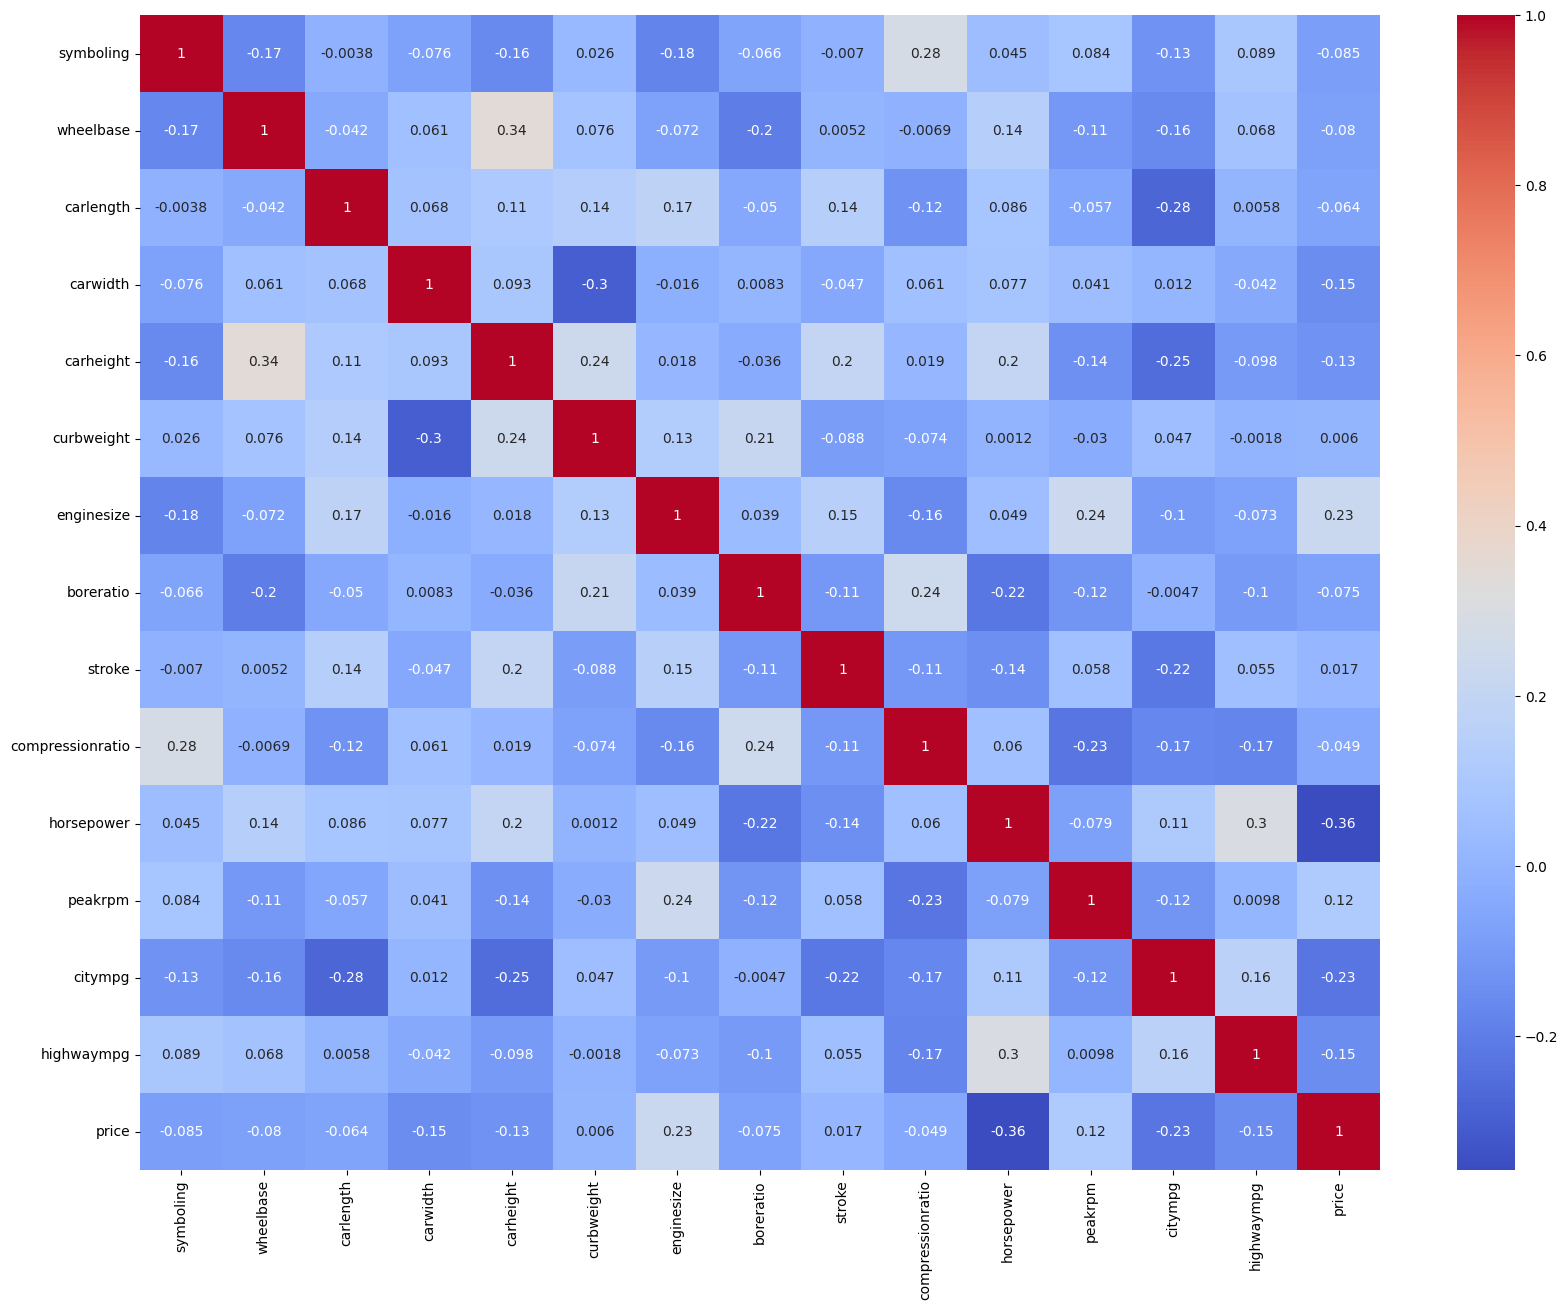

Model Score: 1.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

#Importing the dataset
data = pd.read_csv("CarPrice.csv")

#Data Exploration
print(data.head())
print(data.shape)
print(data.isnull().sum()) #Checking if the dataset has NULL Values
print(data.info())
print(data.describe())
print(data.CarName.unique())

#Analysing correlations & using heatmap
print(data.corr(numeric_only=True))
plt.figure(figsize=(20, 15))
correlations = data.corr(numeric_only=True)
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

#Training a Car Price Prediction Model
predict = "price"
data = data[["symboling", "wheelbase", "carlength",
             "carwidth", "carheight", "curbweight",
             "enginesize", "boreratio", "stroke",
             "compressionratio", "horsepower", "peakrpm",
             "citympg", "highwaympg", "price"]]
x = np.array(data.drop([predict], axis=1)) # Use axis=1 to drop a column
y = np.array(data[predict])

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
print("Model Score:", model.score(xtest, predictions))

Implement House price Prediction using appropriate machine learning algorithm

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1         158       FV   124.813876     6936   Grvl   NaN      IR1   
1   2         151  C (all)   119.751239    10183   Pave   NaN      Reg   
2   3         179  C (all)   140.626216     8296   Grvl   NaN      IR1   
3   4          52       FV   131.419738     7719   Grvl   NaN      Reg   
4   5         161  C (all)    20.793057     7993   Pave  Grvl      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Bnk    NoSeWa  ...      167     Ex   GdWo        TenC    2669   
1         Bnk    AllPub  ...      180    NaN  MnPrv        Shed    3854   
2         HLS    NoSeWa  ...      155    NaN    NaN        Othr    2457   
3         Low    AllPub  ...      149     Ex  MnPrv        Gar2    4570   
4         HLS    NoSeWa  ...       58     Ex  GdPrv        Othr    3951   

  MoSold YrSold  SaleType  SaleCondition      SalePrice  
0      2   2004       New        Partial  3602

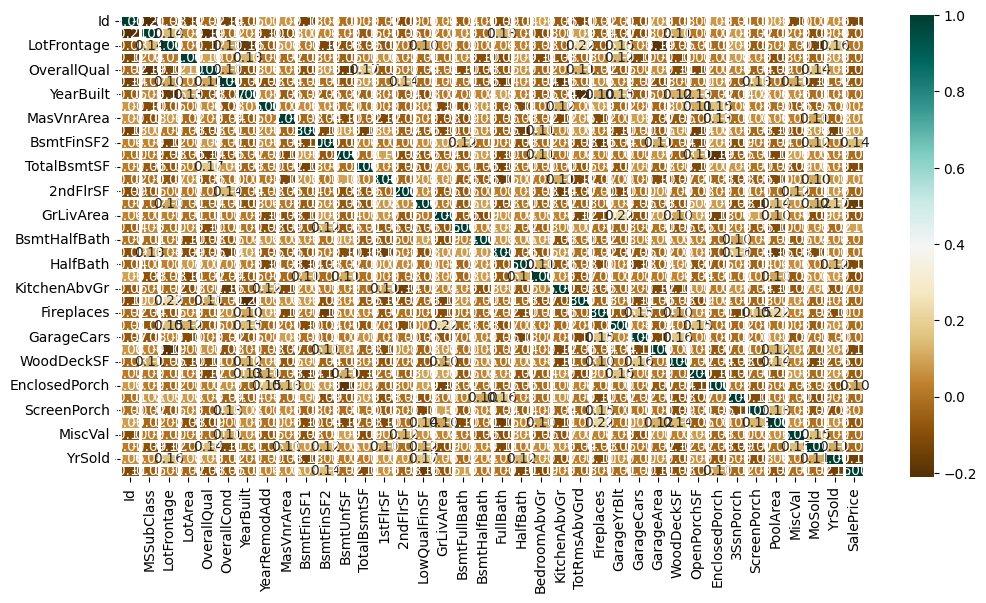

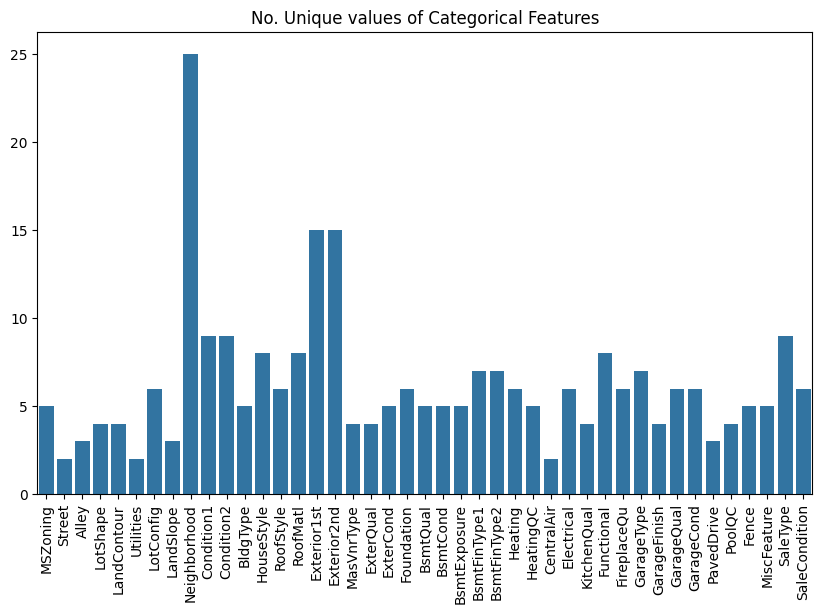

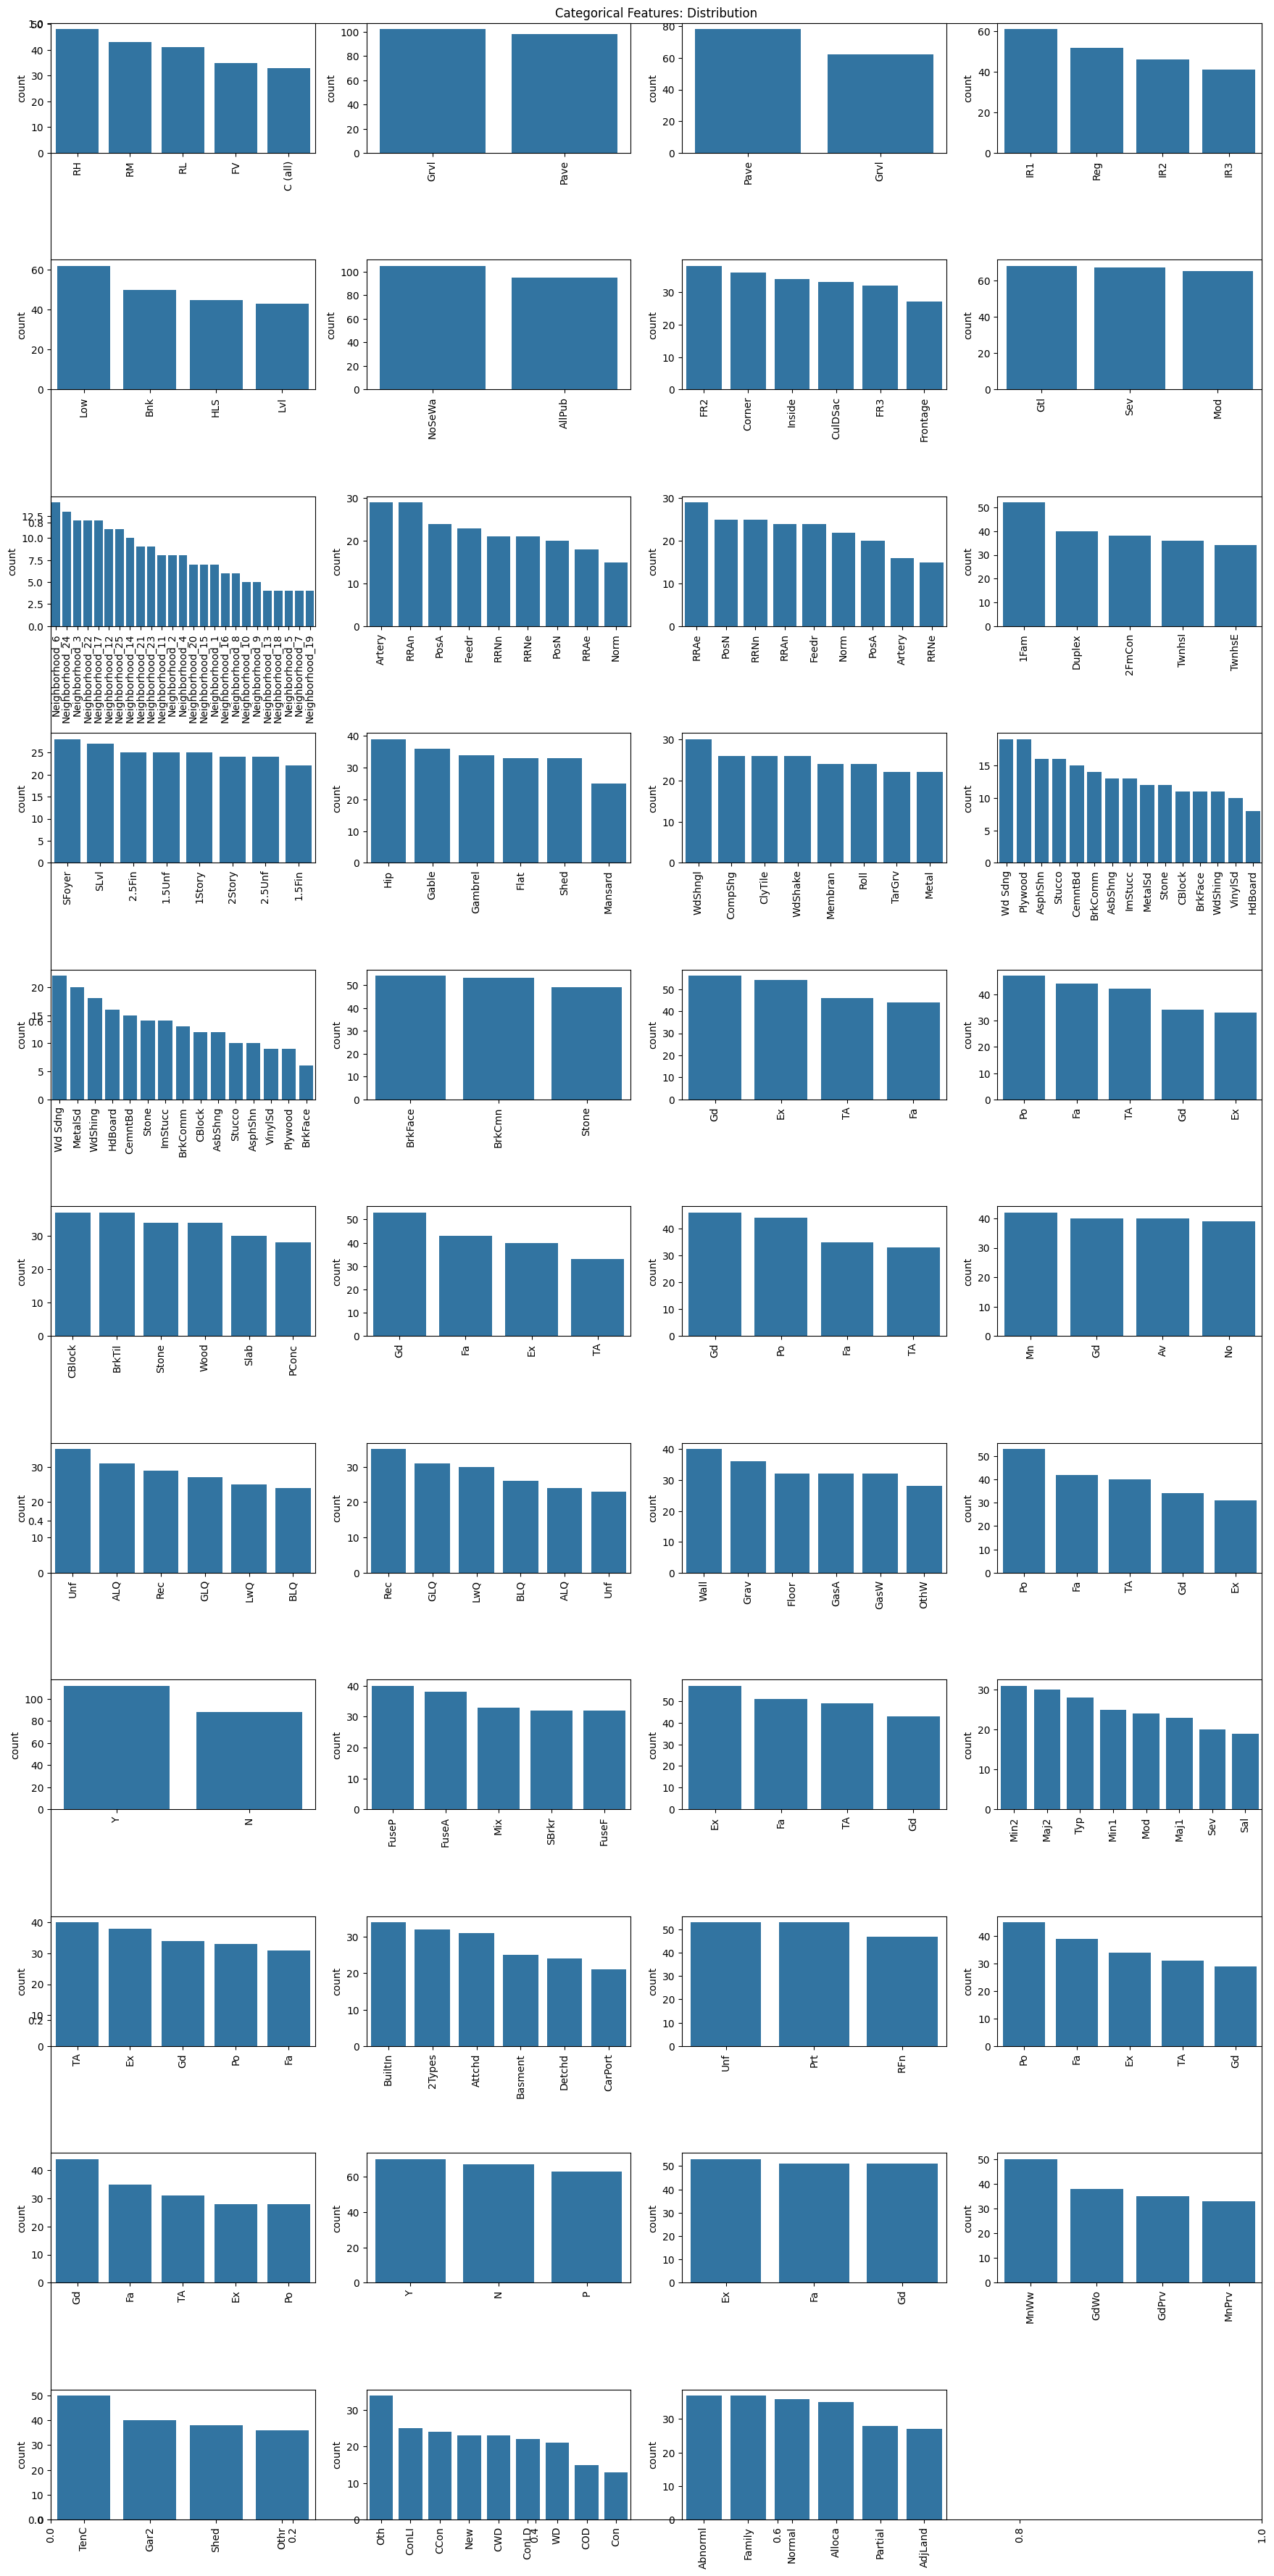

Shape of dataset after dropping NaNs: (12, 80)
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64
Categorical variables:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
No. of. categorical features:  43
Mean Absolute Percentage Error for SVR: 1.1147265278143383
Mean Absolute Percentag

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Importing Dataset
dataset = pd.read_csv("HousePricePrediction.csv")
#Exploring dataset
print(dataset.head(5))
dataset.shape
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

# Handle categorical variables before calculating correlation
# For simplicity, we'll drop them for the heatmap
numerical_dataset = dataset.select_dtypes(include=np.number)

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

unique_values = []
for col in object_cols:
    unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)
plt.show() # Add plt.show() to display this plot

plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
        y = dataset[col].value_counts()
        plt.subplot(11, 4, index)
        plt.xticks(rotation=90)
        sns.barplot(x=list(y.index), y=y)
        index += 1
plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show() # Add plt.show() to display this plot

dataset.drop(['Id'],axis=1,inplace=True)
dataset['SalePrice'] = dataset['SalePrice'].fillna(dataset['SalePrice'].mean())
new_dataset = dataset.dropna()
print(new_dataset.isnull().sum()) # Print null counts after dropping rows

from sklearn.preprocessing import OneHotEncoder
s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',len(object_cols))

# Handle unknown values in OneHotEncoder by ignoring them
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
# Generate feature names and assign them to OH_cols
OH_cols.columns = OH_encoder.get_feature_names_out(object_cols)
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print("Mean Absolute Percentage Error for SVR:", mean_absolute_percentage_error(Y_valid, Y_pred))

#LinearRegression
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print("Mean Absolute Percentage Error for Linear Regression:", mean_absolute_percentage_error(Y_valid, Y_pred))

Implement Iris Flower Classification using Naive Bayes classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import datasets
from sklearn.metrics import confusion_matrix
#Load the iris dataset
iris = datasets.load_iris()
#GaussianNB and MultinomialNB Models
gnb = GaussianNB()
mnb = MultinomialNB()
#Train both GaussianNB and MultinomialNB Models and print their confusion matrices
y_pred_gnb = gnb.fit(iris.data, iris.target).predict(iris.data)
cnf_matrix_gnb = confusion_matrix(iris.target, y_pred_gnb)
print("Confusion Matrix of GNB \n",cnf_matrix_gnb)

y_pred_mnb = mnb.fit(iris.data, iris.target).predict(iris.data)
cnf_matrix_mnb = confusion_matrix(iris.target, y_pred_mnb)
print("Confusion Matrix of MNB \n",cnf_matrix_mnb)

Confusion Matrix of GNB 
 [[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]
Confusion Matrix of MNB 
 [[50  0  0]
 [ 0 46  4]
 [ 0  3 47]]


Compare different types Classification Algorithms and evaluate their performance.

In [ ]:
import numpy
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report

iris= pd.read_csv("IRIS.csv") # Modified to read the local file
print(iris.head())

x = iris.drop("species", axis=1)
y = iris["species"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42) # Changed test_size to 0.2 for splitting

#x = np.array(data[["Age", "EstimatedSalary"]])
#y = np.array(data[["Purchased"]])

#xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42) # Commented out redundant split
decisiontree = DecisionTreeClassifier()
logisticregression = LogisticRegression()
knearestclassifier = KNeighborsClassifier()
#svm_classifier = SVC() # Commented out unused classifier
bernoulli_naiveBayes = BernoulliNB()
passiveAggressive = PassiveAggressiveClassifier()

knearestclassifier.fit(x_train, y_train)
decisiontree.fit(x_train, y_train)
logisticregression.fit(x_train, y_train)
passiveAggressive.fit(x_train, y_train)

# Evaluate on the test set
data1 = {"Classification Algorithms": ["KNN Classifier", "Decision Tree Classifier",
                                       "Logistic Regression", "Passive Aggressive Classifier"],
      "Score": [knearestclassifier.score(x_test,y_test), decisiontree.score(x_test, y_test), # Evaluate on test set
                logisticregression.score(x_test, y_test), passiveAggressive.score(x_test,y_test) ]} # Evaluate on test set
score = pd.DataFrame(data1)
display(score) # Use display to show the dataframe

   sepal_length  sepal_width  petal_length  petal_width     species
0      6.259377     2.915962      4.141052     1.064817      setosa
1      4.802420     2.871006      5.780194     0.281015  versicolor
2      4.227877     2.179659      1.985947     0.905492   virginica
3      5.131505     2.734678      4.398924     0.365685   virginica
4      5.719930     2.894679      5.743095     0.711947      setosa


,Classification Algorithms,Score
0,KNN Classifier,0.400000
1,Decision Tree Classifier,0.333333
2,Logistic Regression,0.400000
3,Passive Aggressive Classifier,0.433333


Implement Mobile Price Prediction using appropriate machine learning algorithm

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0           1642     0     0.783780         1   6       1          30   
1           1114     1     1.206090         0   0       1           2   
2            510     0     0.744817         0   7       1          32   
3           1623     1     1.536823         1  10       1          55   
4           1069     1     1.667322         1   2       1          47   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0  0.525397        188        5  ...       1535      1085   820    12     8   
1  0.421036        129        7  ...       1128      1483  1222    17     0   
2  0.618148        193        3  ...        495      1595  3252     5    10   
3  0.110236        112        3  ...       1052       231  1957    13    15   
4  0.450972        145        4  ...       1555      1592  1856    16    17   

   talk_time  three_g  touch_screen  wifi  price_range  
0         12        1        

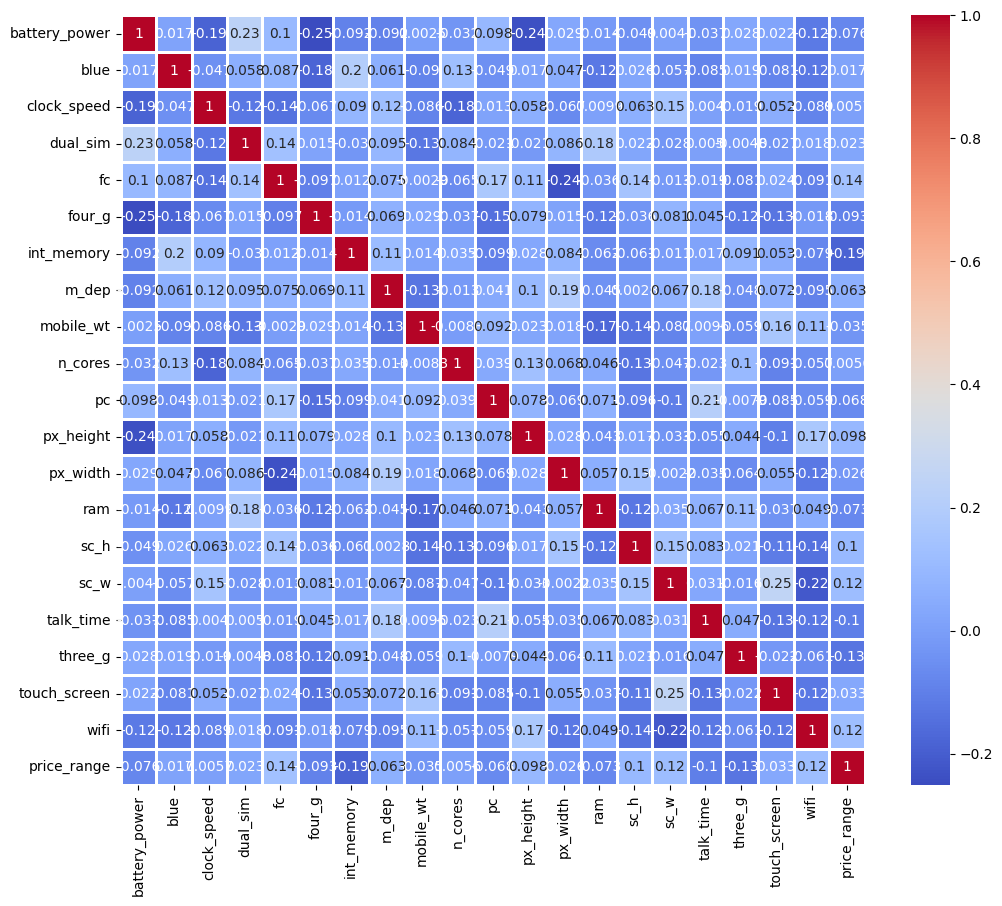

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#importing dataset
data = pd.read_csv("mobile_prices.csv")
print(data.head())
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", linecolor='white', linewidths=1) # Added numeric_only=True

#data preparation
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
x = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# Logistic Regression algorithm provided by Scikit-learn:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(x_train, y_train)
y_pred = lreg.predict(x_test)
 #accuracy of the model:
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy of the Logistic Regression Model: ",accuracy)

#predictions made by the model:
print(y_pred)

(unique, counts) = np.unique(y_pred, return_counts=True)
price_range = np.asarray((unique, counts)).T
print(price_range)

Implement Perceptron based IRIS classification

In [ ]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.3, random_state=1, stratify=y)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.978
Accuracy: 0.978


Implementation of Naive Bayes classification for Bank Loan prediction

In [ ]:
import numpy as np
import pandas as pd

dataset = pd.read_csv("breastcancer.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
#GaussianNB(priors=None, var_smoothing=1e-09) # This line is not needed

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy:", accuracy_score(y_test, y_pred)) # Added print for accuracy

[[8 8]
 [4 5]]
Accuracy: 0.52


Implement Future Sales Prediction using a suitable machine learning algorithm

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.io as io
io.renderers.default='colab' # Changed renderer to 'colab'

data = pd.read_csv("futuresale prediction.csv")
print(data.head())
print(data.sample(5))
print(data.isnull().sum())

import plotly.express as px
import plotly.graph_objects as go
figure = px.scatter(data_frame = data, x="Sales",
                    y="TV", size="TV", trendline="ols")
figure.show()

figure = px.scatter(data_frame = data, x="Sales",
                    y="Newspaper", size="Newspaper", trendline="ols")
figure.show()

figure = px.scatter(data_frame = data, x="Sales",
                    y="Radio", size="Radio", trendline="ols")
figure.show()

correlation = data.corr()
print(correlation["Sales"].sort_values(ascending=False))
x = np.array(data.drop(["Sales"], axis=1)) # Corrected drop syntax
y = np.array(data["Sales"])



xtrain, xtest, ytrain, ytest = train_test_split(x, y,   test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))
# Removed the incorrect line: features = [[TV, Radio, Newspaper]]
features = np.array([[230.1, 37.8, 69.2]])
print(model.predict(features))

           TV      Radio   Newspaper      Sales
0   32.134865   4.844063   95.935464  12.098574
1  122.990567  11.728177   76.167894  24.955827
2  109.531272  19.758354    8.063626  17.046779
3  224.074173  11.419932   58.174511   4.518585
4   33.227165  42.600929  111.712009  21.164959
             TV      Radio   Newspaper      Sales
9    177.186015  33.776144   19.740221  22.057843
130  126.161518   5.671116  110.983283  29.522827
191  214.661354  28.986885   10.902142  26.125196
56    16.609117  11.121979  111.912764  11.411048
172  163.481349  44.926996  104.900814  10.256574
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


Sales        1.000000
TV           0.059790
Radio        0.033563
Newspaper    0.026347
Name: Sales, dtype: float64
-0.06580617607993955
[16.60620791]
